# Lecture 12: More plotting: animations and maps
2019-07-09

Course material is available at http://unihb.eu/pdap2019

## Animations

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

### Method 1: Creating single plots first, combining into an animation later (without Python)

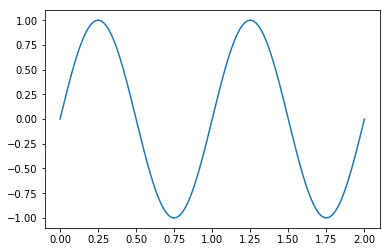

In [2]:
x = np.linspace(0, 2, 1001)
y = np.sin(2 * np.pi * (x))

plt.plot(x, y)

(-2, 2)

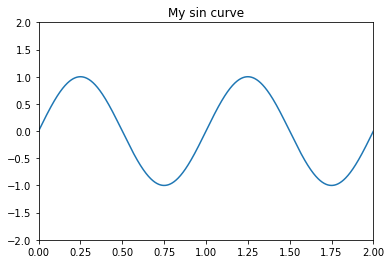

In [3]:
ax = plt.axes()
x = np.linspace(0, 2, 1001)
y = np.sin(2 * np.pi * (x))

ax.plot(x, y)
ax.set_title("My sin curve")
ax.set_xlim((0, 2))
ax.set_ylim((-2, 2))

(-2, 2)

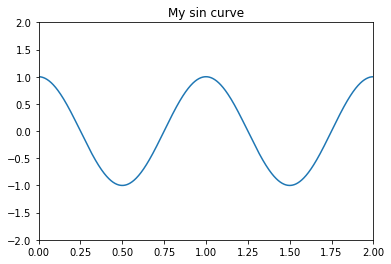

In [4]:
ii = 30
ax = plt.axes()
x = np.linspace(0, 2, 1001)
y = np.sin(2 * np.pi * (x - 0.025 * ii))

ax.plot(x, y)
ax.set_title("My sin curve")
ax.set_xlim((0, 2))
ax.set_ylim((-2, 2))

In [5]:
def create_single_frame(ii):
    ax = plt.axes()
    x = np.linspace(0, 2, 1001)
    y = np.sin(2 * np.pi * (x - 0.025 * ii))

    ax.plot(x, y)
    ax.set_title("My sin curve")
    ax.set_xlim((0, 2))
    ax.set_ylim((-2, 2))

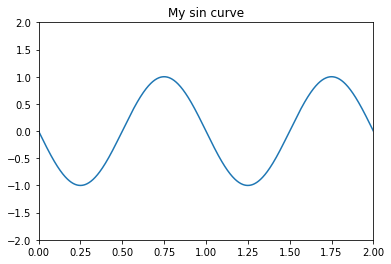

In [6]:
create_single_frame(100)

In [7]:
def create_single_frame(ii):
    fig, ax = plt.subplots()
    x = np.linspace(0, 2, 1001)
    y = np.sin(2 * np.pi * (x - 0.025 * ii))

    ax.plot(x, y)
    ax.set_title("My sin curve")
    ax.set_xlim((0, 2))
    ax.set_ylim((-2, 2))
    
    fig.savefig("animation_frame_{}.png".format(ii + 1))

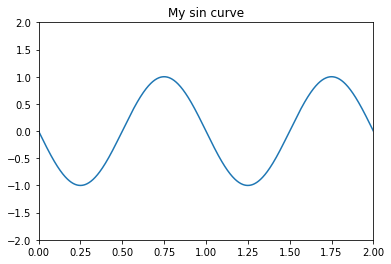

In [8]:
create_single_frame(100)

In [9]:
!ls animation_frame_*.png

animation_frame_101.png


In [10]:
def create_single_frame(ii):
    fig, ax = plt.subplots()
    x = np.linspace(0, 2, 1001)
    y = np.sin(2 * np.pi * (x - 0.025 * ii))

    ax.plot(x, y)
    ax.set_title("My sin curve")
    ax.set_xlim((0, 2))
    ax.set_ylim((-2, 2))
    
    fig.savefig("animation_frame_{seq:03d}.png".format(seq=ii + 1))

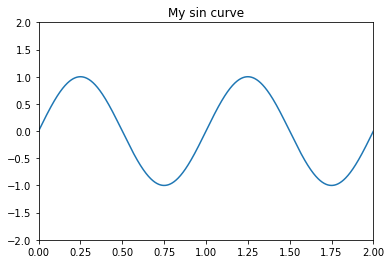

In [11]:
create_single_frame(0)

In [12]:
!ls animation_frame_*.png

animation_frame_001.png  animation_frame_101.png


In [13]:
def create_single_frame(ii):
    fig, ax = plt.subplots()
    x = np.linspace(0, 2, 1001)
    y = np.sin(2 * np.pi * (x - 0.025 * ii))

    ax.plot(x, y)
    ax.set_title("My sin curve")
    ax.set_xlim((0, 2))
    ax.set_ylim((-2, 2))
    
    fig.savefig("animation_frame_{seq:03d}.png".format(seq=ii + 1))
    plt.close(fig)

In [14]:
create_single_frame(2)

In [15]:
!ls animation_frame_*.png

animation_frame_001.png  animation_frame_003.png  animation_frame_101.png


In [16]:
for ii in range(40):
    create_single_frame(ii)

In [17]:
!ls animation_frame_*.png

animation_frame_001.png  animation_frame_015.png  animation_frame_029.png
animation_frame_002.png  animation_frame_016.png  animation_frame_030.png
animation_frame_003.png  animation_frame_017.png  animation_frame_031.png
animation_frame_004.png  animation_frame_018.png  animation_frame_032.png
animation_frame_005.png  animation_frame_019.png  animation_frame_033.png
animation_frame_006.png  animation_frame_020.png  animation_frame_034.png
animation_frame_007.png  animation_frame_021.png  animation_frame_035.png
animation_frame_008.png  animation_frame_022.png  animation_frame_036.png
animation_frame_009.png  animation_frame_023.png  animation_frame_037.png
animation_frame_010.png  animation_frame_024.png  animation_frame_038.png
animation_frame_011.png  animation_frame_025.png  animation_frame_039.png
animation_frame_012.png  animation_frame_026.png  animation_frame_040.png
animation_frame_013.png  animation_frame_027.png  animation_frame_101.png
animation_frame_014.png  animation_fra

In [18]:
##!ffmpeg -framerate 20 -i animation_frame_%03d.png anim_0.mp4

In [19]:
!ffmpeg -y -framerate 20 -i animation_frame_%03d.png -pix_fmt yuv420p -c:v libx264 -movflags +faststart -filter:v crop='floor(in_w/2)*2:floor(in_h/2)*2' anim_0.mp4

ffmpeg version 4.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/home/jupyterhub/conda/envs/prod --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1551253354453/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 22.100 / 56. 22.100
  libavcodec     58. 35.100 / 58. 35.100
  libavformat    58. 20.100 / 58. 20.100
  libavdevice    58.  5.100 / 58.  5.100
  libavfilter     7. 40.101 /  7. 40.101
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  3.100 /  5.  3.100
  libswresample   3.  3.100 /  3.  3.100
  libpostproc    55.  3.100 / 55.  3.100
Input #0, image2, from 'animation_frame_%03d.png':
  Dur

In [20]:
!ls anim*.mp4

anim_0.mp4  anim_1.mp4	anim.mp4


<video controls src="anim_0.mp4" />

### Method 2: Creating the animation within Python

In [21]:
import matplotlib as mpl
import matplotlib.animation
from IPython.display import HTML

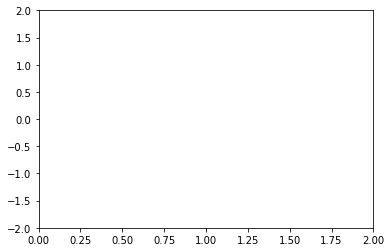

In [22]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [23]:
def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.025 * i))
    line.set_data(x, y)
    return (line,)

In [24]:
anim = mpl.animation.FuncAnimation(fig, animate,
                                   init_func=init,
                                   frames=40, interval=50,
                                   blit=True)

In [25]:
anim.save('anim_1.mp4')

In [26]:
HTML(anim.to_html5_video())

## Plotting maps with Cartopy

In [27]:
import cartopy.crs as ccrs

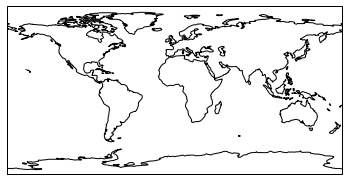

In [28]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

Text(0.5, 1.0, 'My Title')

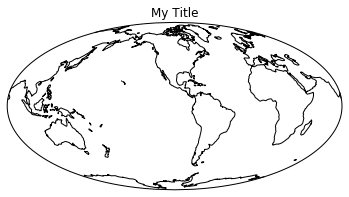

In [29]:
ax = plt.axes(projection=ccrs.Mollweide(central_longitude=-100.))
#ax = plt.axes()
ax.coastlines()
ax.set_title("My Title")

In [30]:
import xarray as xr
sst = xr.open_dataset('/data/pdap/xarray/NOAA_NCDC_ERSST_v3b_SST.nc').sst
sst

<xarray.DataArray 'sst' (time: 684, lat: 89, lon: 180)>
[10957680 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

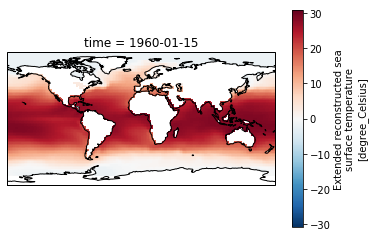

In [31]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
sst[0].plot(ax=ax)

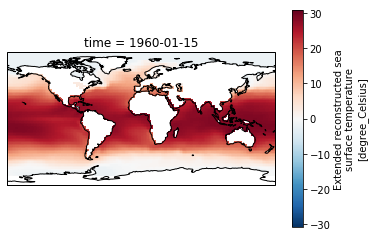

In [32]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
sst[0].plot(ax=ax)

In [33]:
# THIS IS NOT WORKING YET.  IF INTERESTED, CHECK OUT https://github.com/pydata/xarray/issues/3169

# p = sst[0].plot(transform=ccrs.PlateCarree(), 
#                 subplot_kws={'projection': ccrs.PlateCarree()},
#                 x='lon', y='lat')
# p.axes.coastlines()

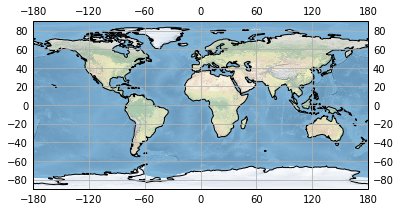

In [34]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)

In [35]:
import cartopy.feature as cfeature

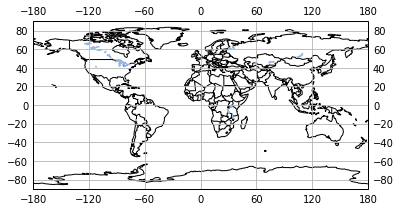

In [36]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)

For more geographical / political / administrative features, check out https://scitools.org.uk/cartopy/docs/v0.15/examples/feature_creation.html.  Cartopy has support for http://naturalearthdata.com/.

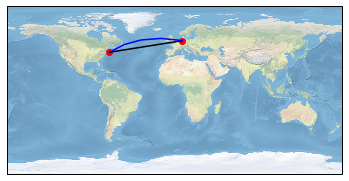

In [37]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
NYx, NYy = -70, 40.7
ax.scatter(NYx, NYy, c='r', transform=ccrs.PlateCarree())
HBx, HBy = 8, 53.1
ax.scatter(HBx, HBy, c='r', transform=ccrs.PlateCarree())
ax.plot([NYx, HBx], [NYy, HBy], 'k-', transform=ccrs.PlateCarree())
ax.plot([NYx, HBx], [NYy, HBy], 'b-', transform=ccrs.Geodetic());

When we choose an orthographic projection, we can see that the great circle (blue) is actually a straight line:

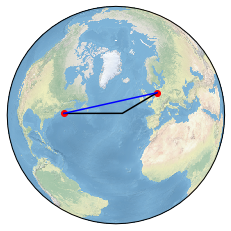

In [38]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-31, central_latitude=46.9))
ax.stock_img()
NYx, NYy = -70, 40.7
ax.scatter(NYx, NYy, c='r', transform=ccrs.PlateCarree())
HBx, HBy = 8, 53.1
ax.scatter(HBx, HBy, c='r', transform=ccrs.PlateCarree())
ax.plot([NYx, HBx], [NYy, HBy], 'k-', transform=ccrs.PlateCarree())
ax.plot([NYx, HBx], [NYy, HBy], 'b-', transform=ccrs.Geodetic());

In [39]:
lats = np.random.randint(-90, 90, 20)
lons = np.random.randint(-180, 180, 20)
meas = np.abs(np.random.randn(20))

In [40]:
lons.max()

179

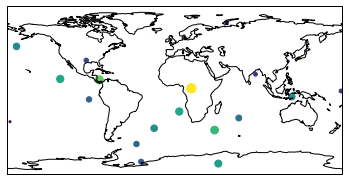

In [41]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.scatter(lons, lats, s=meas*30, c=meas)
ax.set_extent([-180., 180., -90., 90.])
ax.coastlines()

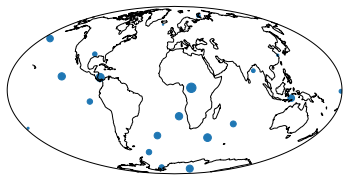

In [42]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.scatter(lons, lats, s=meas*30, transform=ccrs.PlateCarree())
ax.set_global()
ax.coastlines();

TypeError: Cannot label gridlines on a Mollweide plot.  Only PlateCarree and Mercator plots are currently supported.

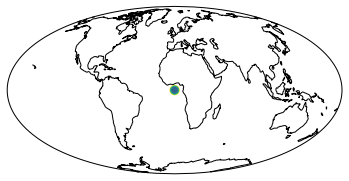

In [43]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.scatter(lons, lats, s=meas*30, c=meas)
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True);